In [1]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [2]:
os.path.join('code','train.csv' )

'code/train.csv'

In [3]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [7]:
df.iloc[12]['comment_text']

'Hey... what is it..\n@ | talk .\nWhat is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?\n\nAsk Sityush to clean up his behavior than issue me nonsensical warnings...'

In [8]:
df[df.columns[2:]].iloc[12]

toxic            1
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 12, dtype: int64

Pre Process

In [9]:
from tensorflow.keras.layers import TextVectorization

In [10]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [11]:
MAX_FEATURES = 200000 #number of words in the vocab

In [12]:
vectorizer = TextVectorization(max_tokens = MAX_FEATURES,
                              output_sequence_length = 1800,
                              output_mode = 'int')

In [13]:
type(X)

pandas.core.series.Series

In [14]:
type(X.values)

numpy.ndarray

In [15]:
vectorizer.adapt(X.values)

In [16]:
vectorizer('Hello world, life is great')[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([288, 263, 306,   9, 275])>

In [17]:
vectorized_text = vectorizer(X.values)

In [18]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [19]:
#Tensor Data Pipeline

dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16) # EVery batch will contain 16 samples
dataset = dataset.prefetch(8) # Helps bottlenecks

In [20]:
dataset.as_numpy_iterator().next()

(array([[   482,   2114,   1781, ...,      0,      0,      0],
        [107884,  98877,     71, ...,      0,      0,      0],
        [    82,      2,    741, ...,      0,      0,      0],
        ...,
        [    51,     71,    154, ...,      0,      0,      0],
        [     3,   3836,    706, ...,      0,      0,      0],
        [124673,     13,    140, ...,      0,      0,      0]]),
 array([[1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

In [23]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [24]:
len(train)

6981

In [25]:
train_generator = train.as_numpy_iterator()
train_generator.next()

(array([[    2, 18456,    78, ...,     0,     0,     0],
        [37265, 92856,     1, ...,     0,     0,     0],
        [    9,    12,    87, ...,     0,     0,     0],
        ...,
        [   32,    85,    30, ...,     0,     0,     0],
        [  191,   288,     1, ...,     0,     0,     0],
        [   34,   291,    61, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [27]:
model = Sequential()
# Create the embedding layer
model.add(Embedding(MAX_FEATURES+1, 32))
# Create the Bidirectional LSTM layer. LSTM needs tanh activation.
model.add(Bidirectional(LSTM(32, activation = 'tanh')))
# Feature extractor Fully connected Layer
model.add(Dense(128, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
# Final Year
model.add(Dense(6, activation = 'sigmoid'))

In [28]:
model.compile(loss = 'BinaryCrossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [32]:
history = model.fit(train, epochs = 2, validation_data = val )

Epoch 1/2
6981/6981 [==============================] - 811s 116ms/step - loss: 0.0507 - accuracy: 0.9893 - val_loss: 0.0430 - val_accuracy: 0.9943
Epoch 2/2
6981/6981 [==============================] - 788s 113ms/step - loss: 0.0437 - accuracy: 0.9934 - val_loss: 0.0375 - val_accuracy: 0.9945


In [33]:
history.history

{'loss': [0.05072733759880066, 0.04368061572313309],
 'accuracy': [0.9892833828926086, 0.9933659434318542],
 'val_loss': [0.042997170239686966, 0.0375344380736351],
 'val_accuracy': [0.9942953586578369, 0.994546115398407]}

In [35]:
import matplotlib.pyplot as plt

<Figure size 800x500 with 0 Axes>

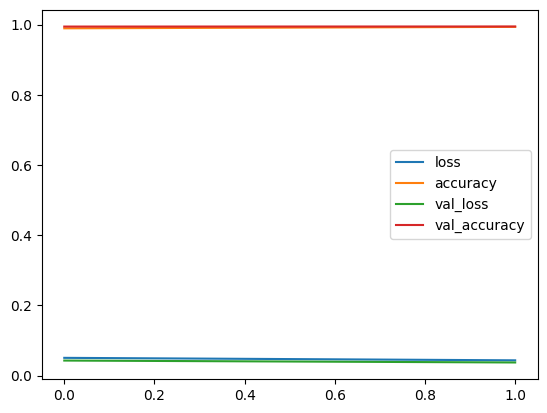

In [36]:
plt.figure(figsize = (8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [38]:
input_text = vectorizer('You freaking suck! I am going to hurt')

In [39]:
input_text

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([   7, 7158,  397, ...,    0,    0,    0])>

In [40]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [41]:
model.predict(np.expand_dims(input_text, 0))

1/1 [==============================] - 1s 1s/step


array([[0.99344915, 0.23531349, 0.9730621 , 0.03995176, 0.8554023 ,
        0.16117151]], dtype=float32)

In [42]:
batch = test.as_numpy_iterator().next()

In [44]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [45]:
model.predict(batch_X)

1/1 [==============================] - 0s 96ms/step


array([[3.97184922e-04, 8.50092430e-15, 2.05062383e-06, 8.54200155e-10,
        3.14956083e-06, 4.01823250e-08],
       [1.44323029e-04, 1.78809277e-16, 4.40868945e-07, 6.79679091e-11,
        6.66172241e-07, 5.46249534e-09],
       [8.12389888e-04, 3.87101240e-14, 2.68516055e-06, 6.94127777e-09,
        5.06582546e-06, 1.01370404e-07],
       [9.98152435e-01, 4.45565760e-01, 9.86043692e-01, 6.51932433e-02,
        9.25504088e-01, 3.08522254e-01],
       [1.79533422e-01, 1.99207534e-05, 1.11552598e-02, 1.29995600e-03,
        2.22093519e-02, 2.45483732e-03],
       [4.38876569e-01, 8.28371907e-04, 6.47521466e-02, 8.57937895e-03,
        1.16676122e-01, 1.67092644e-02],
       [2.08084984e-03, 4.01917518e-12, 2.30180085e-05, 5.45109096e-08,
        3.65969063e-05, 9.94123411e-07],
       [1.31729664e-02, 1.68512271e-09, 2.15127380e-04, 5.74042133e-06,
        4.02178790e-04, 2.51397323e-05],
       [2.00083805e-03, 1.66593269e-12, 1.33192871e-05, 5.87126934e-08,
        2.42910646e-05, 

In [46]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 62ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [47]:
res = model.predict(np.expand_dims(input_text, 0))

1/1 [==============================] - 0s 52ms/step


In [48]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [49]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [52]:
for batch in test.as_numpy_iterator():

    #Unpack the bacth
    X_true, y_true = batch
    # Make a prediction
    yhat = model.predict(X_true)

    #Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()


    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 55ms/step


In [53]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()} ')

Precision: 0.8362681269645691, Recall: 0.746964693069458, Accuracy: 0.5105316042900085 


In [56]:
import gradio as gr

In [58]:
model.save('my_model.keras')

In [61]:
model = tf.keras.models.load_model('toxicity.h5')

In [62]:
input_str = vectorizer('hey i freakin hate you!')

In [63]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 1s 863ms/step


In [64]:
res

array([[0.6960863 , 0.0048748 , 0.13150252, 0.02564212, 0.30832744,
        0.06315727]], dtype=float32)

In [69]:
!pip install -q gradio --upgrade

In [65]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)

    text = ''
    for idx, col in enumerate(df.columns[2:-1]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)

    return text

In [73]:
from gradio import Textbox
import gradio as gr

interface = gr.Interface(fn=score_comment,
                         inputs=Textbox(lines=2, placeholder='Comment to score'),
                         outputs='text')

In [74]:
interface.launch(share = True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://82e43c88d20072ef82.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
